# Example Observer Calculation

## Code explanation

Import Python Libraries

In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

initialize the system matrix

$$A = \begin{bmatrix}
0 & -2 \\
1 & -2
\end{bmatrix}
\quad
B = \begin{bmatrix}
0\\
1
\end{bmatrix}
\quad
C = \begin{bmatrix}
0 & 1
\end{bmatrix}
\quad$$

In [23]:
A = np.matrix([
    [0, -2],
    [1, -2]
])

C = np.matrix([
    [0, 1],
])

B = np.matrix([
    [0, 1],
])
B = np.asarray(np.transpose(B))

Trasform the system in the controllable dual

$$A_{D} = A^{T} = \begin{bmatrix}
0 & 1 \\
-2 & -2
\end{bmatrix}
\quad
C_{D} = C^{T} = \begin{bmatrix}
0 \\
1
\end{bmatrix}
\quad$$

Calculate the Controllability Matrix

$$P = \begin{bmatrix}
B & AB & A^{2}B 
\end{bmatrix}
\quad$$

and check the rank of the matrix. If $$rank(P)=dim(A_{D})$$ the matrix is already in its controllable form

In [24]:
A_D = np.transpose(A)  # Contrallable Dual
B_D = np.transpose(C)  # Contrallable Dual

P = np.concatenate((B_D, A_D*B_D, np.power(A_D,2)*B_D), axis=1)
r = np.linalg.matrix_rank(P)  # rank of P
if r == np.shape(P)[0]:
    print("matrix in its controllable form")
    

matrix in its controllable form


Calculate the Luenberg Observer by placing the eigenvalues of $$A_{D}+B_{D}K_{D}$$ where $$K_{D}=-L^{T}$$

$$K_{D} = \begin{bmatrix}
-d_{0}-A_{D}(2,1) & -d_{1}-A_{D}(2,2) 
\end{bmatrix}$$

In [25]:
d0 = 1
d1 = 1

K_D = np.asmatrix([
    [-d0-A_D[len(A_D)-1,0], -d1-A_D[len(A_D)-1,1]]
    ])
L = -np.transpose(K_D)
print("L = ", L)

L =  [[-1]
 [-1]]


Solve the real system

$$\dot{x} = Ax+Bu \\
y = Cx$$

where $$u = 1.0$$

For that we use the function odeint

In [29]:
def real_system(x,t):
    u = 1.0
    x_1, x_2 = x
    dxdt = [np.asarray(A)[0][0]*x_1+np.asarray(A)[0][1]*x_2+B[0][0]*u, np.asarray(A)[1][0]*x_1+np.asarray(A)[1][1]*x_2+B[1][0]*u]
    y = np.asarray(C)[0][0]*dxdt[0]+np.asarray(C)[0][1]*dxdt[1]
    return dxdt


e0 = [0.0, 1.0]
x0 = [0.0, 1.0]
x0_est = [0.0, 0.0]
t = np.linspace(0, 30, 201)
sol1 = odeint(real_system, x0, t)
[out1, y] = real_system(x0,t)


We can now estimate the state by doing

$$\dot{\hat{x}} = (A-LC)\hat{x}+Bu+Ly$$

In [30]:
def state_estimation(x,t):
    u = 1.0
    x_1, x_2 = x
    dxestdt = [np.asarray(A-L*C)[0][0]*x_1+np.asarray(A-L*C)[0][1]*x_2+B[0][0]*u+np.asarray(L)[0][0]*y, \
                    np.asarray(A-L*C)[1][0]*x_1+np.asarray(A-L*C)[1][1]*x_2+B[1][0]*u+np.asarray(L)[1][0]*y]
    return dxestdt
sol2 = odeint(state_estimation, x0_est, t)


Finally we can calculate the error of the estimation solving:

$$\dot{e} = (A-LC)e$$

In [31]:
def dynamic_error(e,t):
    x_1, x_2 = e
    dedt = [np.asarray(A-L*C)[0][0]*x_1+np.asarray(A-L*C)[0][1]*x_2, np.asarray(A-L*C)[1][0]*x_1+np.asarray(A-L*C)[1][1]*x_2]
    return dedt

sol3 = odeint(dynamic_error, e0, t)

## Results

The first figure represents thedynamic behavior of the state

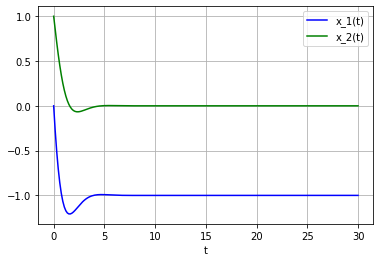

In [32]:
  
fig = plt.figure(1)
plt.plot(t, sol1[:, 0], 'b', label='x_1(t)')
plt.plot(t, sol1[:, 1], 'g', label='x_2(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

The estimated state starts from $$\hat{x}(0) = [0.0,0.0]$$ (observer not initialized)

The state estimation converges to the real state in less than 5 seconds

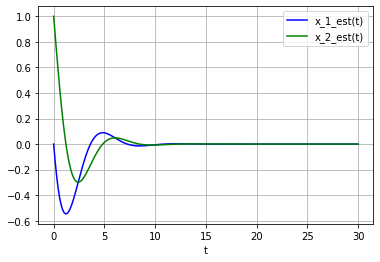

In [33]:
fig = plt.figure(2)
plt.plot(t, sol3[:, 0], 'b', label='x_1_est(t)')
plt.plot(t, sol3[:, 1], 'g', label='x_2_est(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

The dynamic of the error is described in the following result

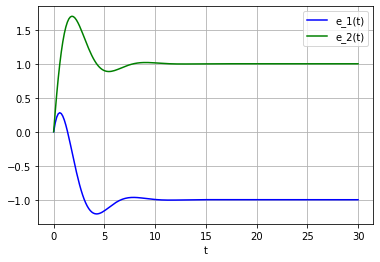

In [34]:
fig = plt.figure(3)
plt.plot(t, sol2[:, 0], 'b', label='e_1(t)')
plt.plot(t, sol2[:, 1], 'g', label='e_2(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()